# Overlapping Null Models and Statistical Tests

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pybedtools
from pybedtools import BedTool
a = pybedtools.example_bedtool('a.bed')
a.saveas('tmp/fake_enhancers.bed')

<BedTool(tmp/fake_enhancers.bed)>

In [3]:
import random
from datetime import datetime

sample_bed = BedTool('tmp/fake_enhancers.bed')
b = sample_bed.shuffle(genome='hg19', chrom=False)
print(a)
print("after shuffle:\n")
print(b) 

chr1	1	100	feature1	0	+
chr1	100	200	feature2	0	+
chr1	150	500	feature3	0	-
chr1	900	950	feature4	0	+

after shuffle:

chr4	69405331	69405430	feature1	0	+
chr14	23411934	23412034	feature2	0	+
chr15	66219348	66219698	feature3	0	-
chr18	28041406	28041456	feature4	0	+



In [4]:
store = pd.HDFStore("../storage/fantom_staging.hdf")
store.keys()

['/permissive', '/permissive_bed']

In [5]:
encode_meta = pd.read_hdf('../storage/encode_staging.hdf', 'encode_metadata')
encode_meta.query("biosample_type == 'tissue' & method == 'DNase_H3K27ac' & assembly == 'hg19'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
24,ENCSR893CEW,hg19,UBERON:0002369,adrenal gland,tissue,Enhancer-like regions using DNase and H3K27ac ...,"[mesoderm,ectoderm]",3,"June, 2016",[adrenal gland],/organisms/human/,[endocrine system],ENCFF952DET.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
26,ENCSR267LGF,hg19,UBERON:0000945,stomach,tissue,Enhancer-like regions using DNase and H3K27ac ...,[],3,"June, 2016",[stomach],/organisms/human/,[digestive system],ENCFF605WXQ.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
67,ENCSR378TPC,hg19,UBERON:0001987,placenta,tissue,Enhancer-like regions using DNase and H3K27ac ...,[mesoderm],3,"June, 2016","[placenta,extraembryonic structure]",/organisms/human/,[reproductive system],ENCFF447DLF.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
92,ENCSR975DLZ,hg19,UBERON:0002370,thymus,tissue,Enhancer-like regions using DNase and H3K27ac ...,"[mesoderm,endoderm]",3,"June, 2016",[thymus],/organisms/human/,"[endocrine system,immune system]",ENCFF190AWD.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
145,ENCSR590FPE,hg19,UBERON:0000945,stomach,tissue,Enhancer-like regions using DNase and H3K27ac ...,[],3,"June, 2016",[stomach],/organisms/human/,[digestive system],ENCFF715DPV.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
149,ENCSR728ESS,hg19,UBERON:0000059,large intestine,tissue,Enhancer-like regions using DNase and H3K27ac ...,[],3,"June, 2016",[large intestine],/organisms/human/,[digestive system],ENCFF978UAS.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
157,ENCSR964LWN,hg19,UBERON:0001264,pancreas,tissue,Enhancer-like regions using DNase and H3K27ac ...,[],3,"June, 2016",[pancreas],/organisms/human/,[],ENCFF154VRY.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
171,ENCSR906UAB,hg19,UBERON:0008450,psoas muscle,tissue,Enhancer-like regions using DNase and H3K27ac ...,[],3,"June, 2016",[muscle organ],/organisms/human/,[musculature of body],ENCFF690YPD.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
186,ENCSR139FKE,hg19,UBERON:0000992,female gonad,tissue,Enhancer-like regions using DNase and H3K27ac ...,[mesoderm],3,"June, 2016",[gonad],/organisms/human/,[reproductive system],ENCFF550JQT.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac
193,ENCSR072NQK,hg19,UBERON:0001383,muscle of leg,tissue,Enhancer-like regions using DNase and H3K27ac ...,[],3,"June, 2016",[muscle organ],/organisms/human/,[musculature of body],ENCFF955CNN.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac


In [6]:
encode_bed = BedTool().from_dataframe(pd.read_hdf("../storage/encode_staging.hdf", "UBERON_0001987_hg19_DNase_H3K27ac_bed"))
fantom_bed = BedTool().from_dataframe(pd.read_hdf("../storage/fantom_staging.hdf", "permissive_bed"))

In [7]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def std_size(bed):
    return int(round(sample_df[['size']].std()))


In [8]:
mean_size(fantom_bed)

288

In [9]:
encode_bed_sorted = encode_bed.sort()
fantom_bed_sorted = fantom_bed.sort()

In [10]:
assembly_path = '../download/genome/hg19_reduced.genome'

In [11]:
fantom_shuffled_bed = fantom_bed.shuffle(g=assembly_path, chrom=False)
fantom_shuffled_bed_sorted = fantom_shuffled_bed.sort()
encode_shuffled_bed = encode_bed.shuffle(g=assembly_path, chrom=False)
encode_shuffled_bed_sorted = encode_shuffled_bed.sort()

In [12]:
empty_bed = BedTool()
fantom_random_bed = empty_bed.random(l=mean_size(fantom_bed), n=len(fantom_bed), g=assembly_path)
fantom_random_bed_sorted = fantom_random_bed.sort()

In [13]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [14]:
fantom_df = fantom_bed.to_dataframe()
fantom_df['size'] = fantom_df.apply(lambda row: compute_size(row), axis = 1)
fantom_df[['size']].describe()

,size
count,43011.000000
mean,287.958964
std,163.374268
min,2.000000
25%,177.000000
50%,275.000000
75%,372.000000
max,2860.000000


In [15]:
fantom_shuffled_df = fantom_shuffled_bed.to_dataframe()
fantom_shuffled_df['size'] = fantom_shuffled_df.apply(lambda row: compute_size(row), axis = 1)
fantom_shuffled_df[['size']].describe()

,size
count,43011.000000
mean,287.958964
std,163.374268
min,2.000000
25%,177.000000
50%,275.000000
75%,372.000000
max,2860.000000


In [16]:
encode_df = encode_bed.to_dataframe()
encode_df['size'] = encode_df.apply(lambda row: compute_size(row), axis = 1)
encode_df[['size']].describe()

,size
count,38389.000000
mean,1879.675949
std,2038.726097
min,150.000000
25%,380.000000
50%,1397.000000
75%,2439.000000
max,32806.000000


In [17]:
encode_bed_sorted.jaccard(fantom_shuffled_bed_sorted, F=1)

{'intersection': 240185,
 'jaccard': 0.00285734,
 'n_intersections': 885,
 'union-intersection': 84059032}

In [18]:
encode_bed_sorted.jaccard(fantom_bed_sorted, F=1)

{'intersection': 2214970,
 'jaccard': 0.0269069,
 'n_intersections': 6491,
 'union-intersection': 82319720}

In [19]:
encode_bed_sorted.fisher(fantom_shuffled_bed_sorted, F=1, g=assembly_path)

<FisherOutput at 4634394240>
# Number of query intervals: 38389
# Number of db intervals: 42207
# Number of overlaps: 889
# Number of possible intervals (estimated): 1426650
# phyper(889 - 1, 38389, 1426650 - 38389, 42207, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 889          | 37500        |
# not in -a | 41318        | 1346943      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
3.1748e-15	1	6.5114e-15	0.773

In [20]:
a = encode_bed_sorted.fisher(fantom_bed_sorted, F=1, g=assembly_path)

In [21]:
a

<FisherOutput at 4650944272>
# Number of query intervals: 38389
# Number of db intervals: 42977
# Number of overlaps: 6492
# Number of possible intervals (estimated): 1426816
# phyper(6492 - 1, 38389, 1426816 - 38389, 42977, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 6492         | 31897        |
# not in -a | 36485        | 1351942      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	7.542

In [22]:
import scipy.stats as stats
obs = [[1000, 41001], [42010, 1729906]]
oddsratio, pvalue = stats.fisher_exact(obs)
chi2 = stats.chi2_contingency(obs)
print("Fisher's oddsratio:", oddsratio, "pvalue:", pvalue)
print("Chi2:", chi2[0], "pvalue:", chi2[1])

Fisher's oddsratio: 1.00432754582 pvalue: 0.883911414896
Chi2: 0.0137163422923 pvalue: 0.906767505506


In [23]:
len(encode_bed_sorted)

38389

In [24]:
encode_bed_sorted.fisher(fantom_bed_sorted, F=1, g=assembly_path)

<FisherOutput at 4654093312>
# Number of query intervals: 38389
# Number of db intervals: 42977
# Number of overlaps: 6492
# Number of possible intervals (estimated): 1426816
# phyper(6492 - 1, 38389, 1426816 - 38389, 42977, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 6492         | 31897        |
# not in -a | 36485        | 1351942      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	7.542

In [25]:
sample_df = sample_bed.to_dataframe()
sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
int(round(sample_df[['size']].mean()))


150

In [26]:
len(sample_df)

4

## Fisher, Jaccard

In [27]:
def build_tests_df_old(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'fisher_left_p', 'fisher_right_p', 'fisher_two_p', 'fisher_oddsratio', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, samples_num):
        min_ovlp = i* 1/samples_num

        #fisher test
        fisher = bed.fisher(bed_overlap_with, f=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        left_tail_fisher_pvalue = fisher.left_tail
        right_tail_fisher_pvalue = fisher.right_tail
        two_tail_fisher_pvalue = fisher.two_tail
        oddsratio_fisher = fisher.ratio

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, f=min_ovlp)
        jaccard_index = jaccard['jaccard']

        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, left_tail_fisher_pvalue, right_tail_fisher_pvalue, 
                     two_tail_fisher_pvalue, oddsratio_fisher, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df
    

In [28]:
def build_tests_df(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'fisher_left_p', 'fisher_right_p', 'fisher_two_p', 'fisher_oddsratio', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, samples_num):
        min_ovlp = i* 1/samples_num

        #fisher test
        fisher = bed.fisher(bed_overlap_with, F=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        left_tail_fisher_pvalue = fisher.left_tail
        right_tail_fisher_pvalue = fisher.right_tail
        two_tail_fisher_pvalue = fisher.two_tail
        oddsratio_fisher = fisher.ratio

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, F=min_ovlp)
        jaccard_index = jaccard['jaccard']

        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, left_tail_fisher_pvalue, right_tail_fisher_pvalue, 
                     two_tail_fisher_pvalue, oddsratio_fisher, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df
    

In [29]:
base_encyclopedia = 'ENCODE'
biosample_name = 'placenta'
overlapping_encyclopedia = 'FANTOM'


tests_df_old = build_tests_df_old(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'placenta', 'hg19', 50)
tests_df_shuffled_old = build_tests_df_old(encode_bed_sorted, fantom_shuffled_bed_sorted, 'ENCODE', 'FANTOM_shuffled', 'placenta', 'hg19', 50)
tests_df_random_old = build_tests_df_old(encode_bed_sorted, fantom_random_bed_sorted, 'ENCODE', 'FANTOM_random', 'placenta', 'hg19', 50)

In [30]:
base_encyclopedia = 'ENCODE'
biosample_name = 'placenta'
overlapping_encyclopedia = 'FANTOM'


tests_df = build_tests_df(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'placenta', 'hg19', 50)
tests_df_shuffled = build_tests_df(encode_bed_sorted, fantom_shuffled_bed_sorted, 'ENCODE', 'FANTOM_shuffled', 'placenta', 'hg19', 50)
tests_df_random = build_tests_df(encode_bed_sorted, fantom_random_bed_sorted, 'ENCODE', 'FANTOM_random', 'placenta', 'hg19', 50)

In [31]:
tests_df.T

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
biosample_name,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,...,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta
ovlp_encyclopedia,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,...,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM
encyclopedia_size,38389,38389,38389,38389,38389,38389,38389,38389,38389,38389,...,38389,38389,38389,38389,38389,38389,38389,38389,38389,38389
ovlp_encyclopedia_size,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011,...,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011
min_ovlp,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,...,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98
ovlp_count,7805,7793,7778,7757,7730,7715,7699,7674,7656,7631,...,6727,6692,6670,6645,6619,6598,6578,6555,6537,6514
fisher_left_p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fisher_right_p,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
tests_df_random.T

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
biosample_name,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,...,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta,placenta
ovlp_encyclopedia,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,...,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random,FANTOM_random
encyclopedia_size,38389,38389,38389,38389,38389,38389,38389,38389,38389,38389,...,38389,38389,38389,38389,38389,38389,38389,38389,38389,38389
ovlp_encyclopedia_size,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011,...,43011,43011,43011,43011,43011,43011,43011,43011,43011,43011
min_ovlp,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,...,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98
ovlp_count,1167,1162,1157,1151,1150,1145,1137,1134,1130,1123,...,925,916,911,907,900,897,893,886,881,876
fisher_left_p,0.92316,0.89882,0.86926,0.82646,0.81853,0.77557,0.696,0.66318,0.6174,0.53345,...,3.2575e-10,4.8521e-11,1.6199e-11,6.5996e-12,1.3124e-12,6.457e-13,2.4678e-13,4.3851e-14,1.2328e-14,3.3659e-15
fisher_right_p,0.081311,0.10666,0.13731,0.18147,0.18961,0.23367,0.31478,0.34807,0.39435,0.47877,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,0.15753,0.20774,0.26865,0.35663,0.37288,0.46085,0.62298,0.67831,0.77038,0.93878,...,6.4467e-10,9.6973e-11,3.1265e-11,1.3408e-11,2.6518e-12,1.3644e-12,4.9753e-13,8.8541e-14,2.4197e-14,6.4328e-15


In [33]:
merged_tests_df = tests_df.append(tests_df_random).append(tests_df_shuffled)
merged_tests_df.reset_index(drop=True, inplace=True)
merged_tests_df['logp'] = -1*np.log(merged_tests_df['fisher_right_p'])

merged_tests_df_old = tests_df_old.append(tests_df_random_old).append(tests_df_shuffled_old)
merged_tests_df_old.reset_index(drop=True, inplace=True)
merged_tests_df_old['logp'] = -1*np.log(merged_tests_df_old['fisher_right_p'])


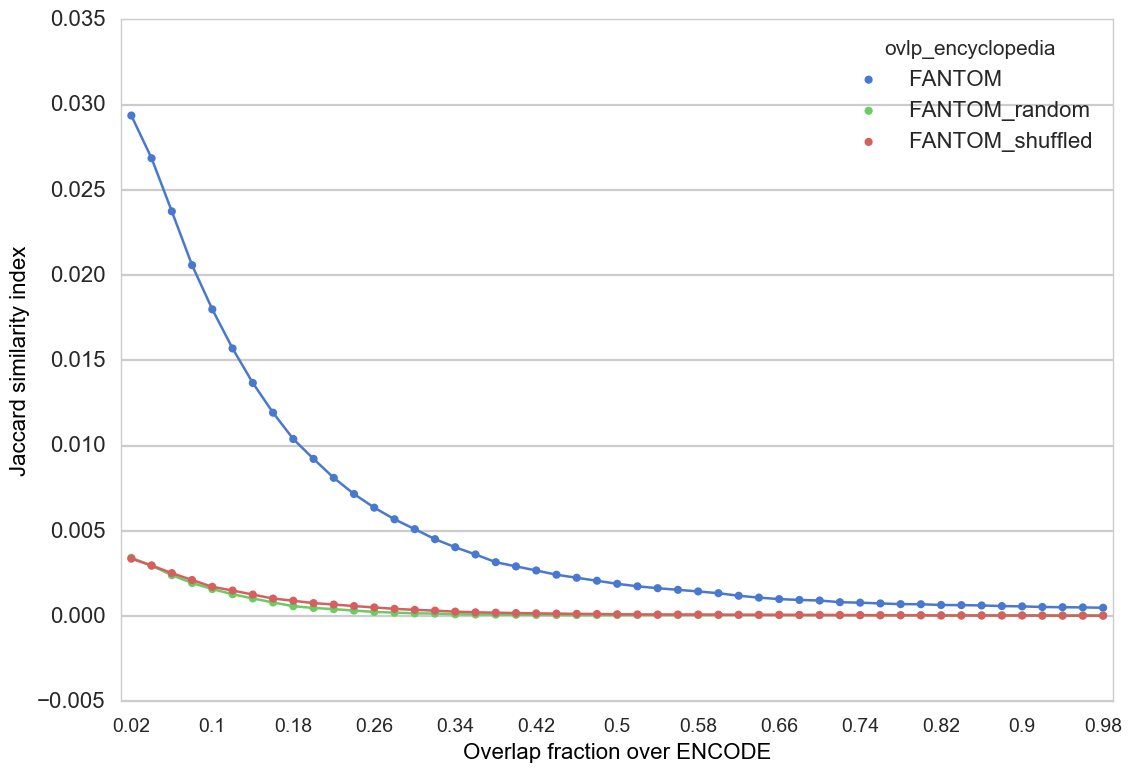

In [35]:
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline
sns.set(style="whitegrid", palette="dark", color_codes=True)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 1})
ax = sns.pointplot(x="min_ovlp", y="jaccard", hue="ovlp_encyclopedia", data=merged_tests_df_old,
                   capsize=.2, palette="muted", size=6, aspect=1)
ax.axes.set_ylabel("Jaccard similarity index",size = 16,color="black",alpha=1)
ax.axes.set_xlabel("Overlap fraction over ENCODE",size = 16,color="black",alpha=1)
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=0, size=14)
#ax.axes.set_yticklabels(labels=ax.axes.get_yticklabels(),rotation=0, size=14)
#ax.axes.set_ylim(0,3000)
#g.axes.set_title('Jaccard Index by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)    
    else:
        label.set_visible(False)
#green_patch = mpatches.Patch(color='blue', label='FANTOM')
#blue_patch = mpatches.Patch(color='green', label='ENCODE')
#ax.legend(title = 'Pippo', loc='upper right', handles=[green_patch, blue_patch])

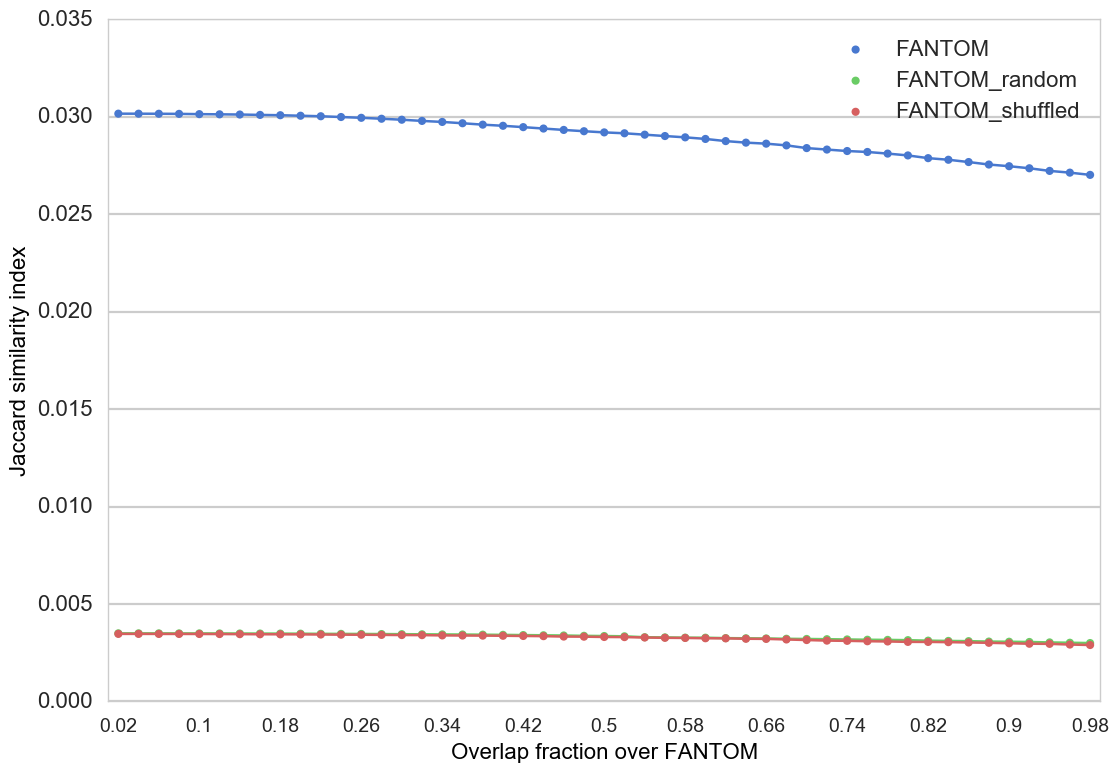

In [36]:
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 1})
ax = sns.pointplot(x="min_ovlp", y="jaccard", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
ax.axes.set_ylabel("Jaccard similarity index",size = 16,color="black",alpha=1)
ax.axes.set_xlabel("Overlap fraction over FANTOM",size = 16,color="black",alpha=1)
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=0, size=14)
#ax.axes.set_yticklabels(labels=ax.axes.get_yticklabels(),rotation=0, size=14)
#ax.axes.set_ylim(0,3000)
#g.axes.set_title('Jaccard Index by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)    
    else:
        label.set_visible(False)

ax.legend(loc='upper right')
        

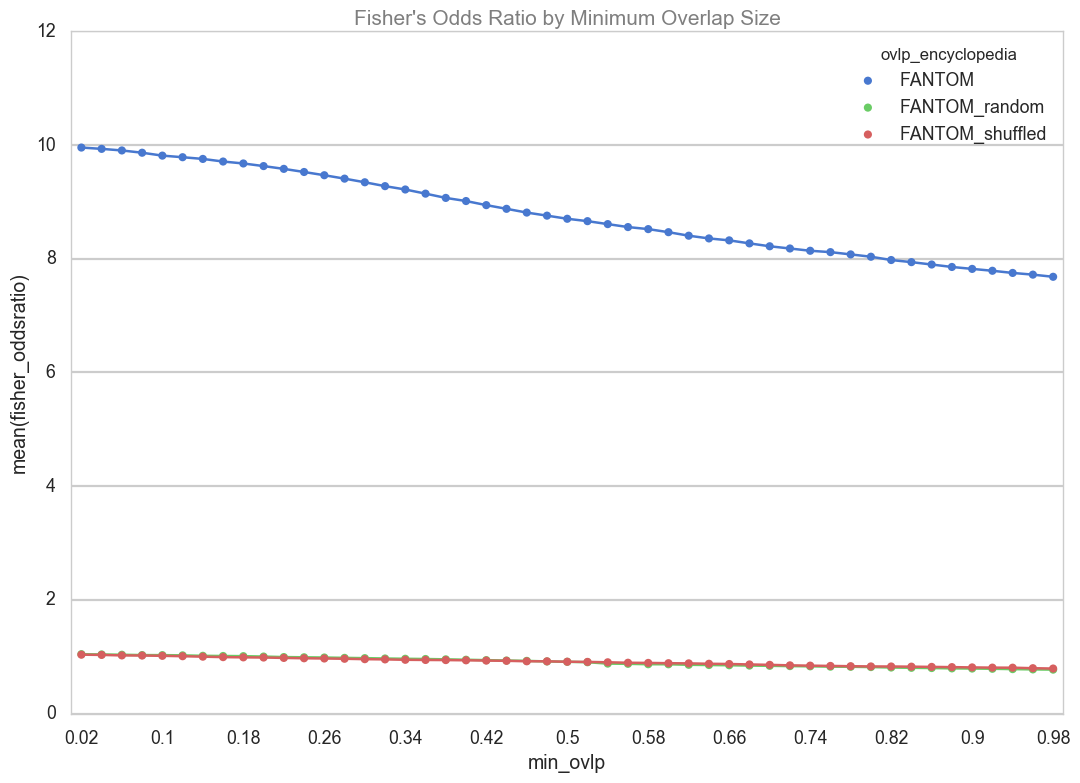

In [37]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="fisher_oddsratio", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Odds Ratio by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

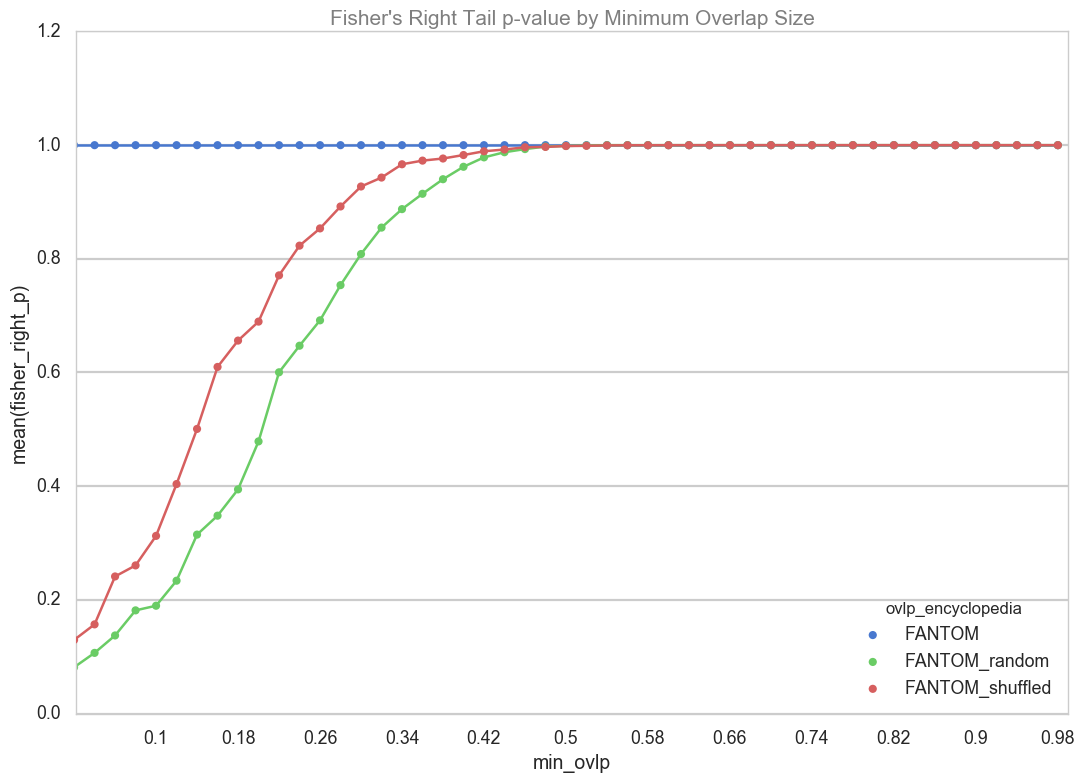

In [38]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="fisher_right_p", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
g.set_xlim(0.1,)
g.set_ylim(0,)
#g.set_ylim(0, 200)
##TODO plottare -log(p-value)
#sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

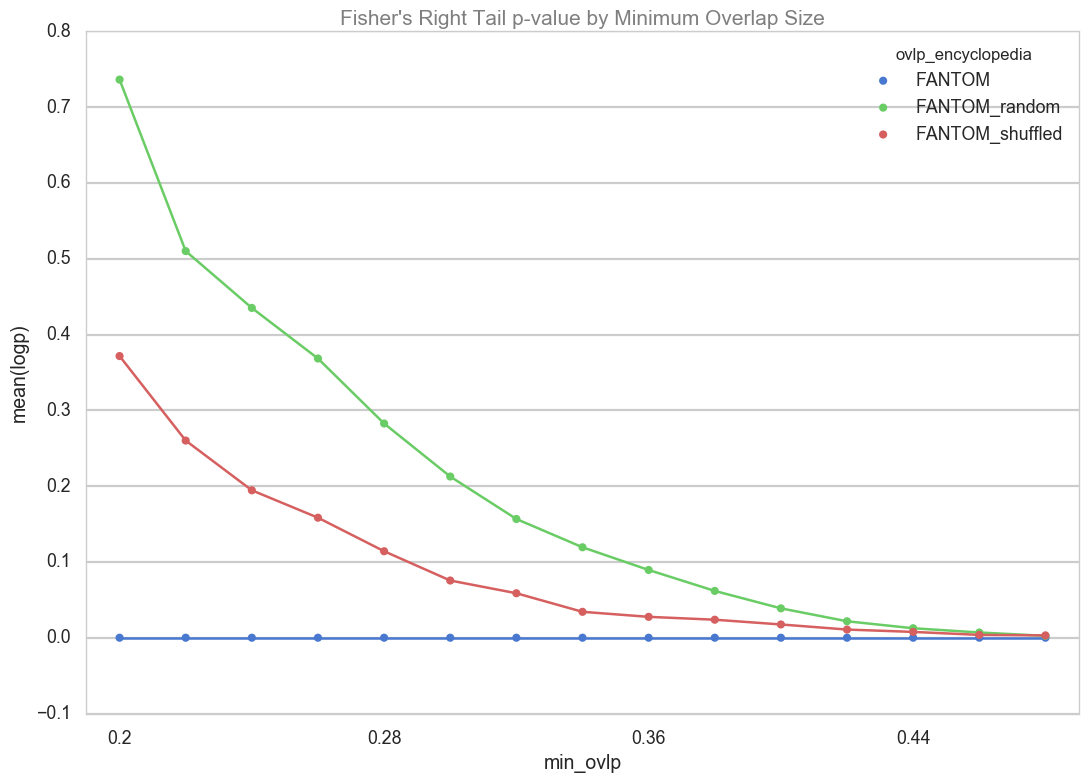

In [39]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="logp", hue="ovlp_encyclopedia", data=merged_tests_df.query('min_ovlp < 0.5 & min_ovlp > 0.18'),
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
#g.set_xlim(0.18,)
#g.set_ylim(0,)
#g.set_ylim(0, 200)
##TODO plottare -log(p-value)
#sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

## Relative Distance

In [40]:
import pandas as pd
df_reldist = pd.DataFrame(encode_bed_sorted.reldist(fantom_bed_sorted))[0:50]
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,2513.000,1412.000,1137.00,982.000,962.000,909.000,902.000,881.000,788.000,822.000,...,611.000,648.000,652.000,642.000,735.000,694.000,630.000,646.000,670.000,674.000
fraction,0.066,0.037,0.03,0.026,0.025,0.024,0.024,0.023,0.021,0.021,...,0.016,0.017,0.017,0.017,0.019,0.018,0.016,0.017,0.017,0.018
reldist,0.000,0.010,0.02,0.030,0.040,0.050,0.060,0.070,0.080,0.090,...,0.400,0.410,0.420,0.430,0.440,0.450,0.460,0.470,0.480,0.490
total,38339.000,38339.000,38339.00,38339.000,38339.000,38339.000,38339.000,38339.000,38339.000,38339.000,...,38339.000,38339.000,38339.000,38339.000,38339.000,38339.000,38339.000,38339.000,38339.000,38339.000


In [41]:
df_reldist_full = pd.DataFrame(columns=['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size',
                    'ovlp_encyclopedia_size',
                    'reldist', 'ovlp_count', 'ovlp_fraction'])


In [42]:
df_reldist_full['reldist'] = df_reldist['reldist']
df_reldist_full['ovlp_count'] = df_reldist['count']
df_reldist_full['ovlp_fraction'] = df_reldist['fraction']


In [43]:
df_reldist_random = pd.DataFrame(encode_bed_sorted.reldist(fantom_shuffled_bed_sorted))[0:50]
df_reldist_random = df_reldist_random[0:50]

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

#d = encode_fantom_df.query('biosample_type == "stem cell" & FA_ovlp_pct > 0')

sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 3})
sns.despine(left=True)

d_all = df_encode_only.query('size > 0')[['size']]
fantoms =  df_fantom_only.query('FA_size > 0')[['FA_size']]

freqs, base = np.histogram(d_all, bins=3000)
freqs_null, base_null = np.histogram(fantoms, bins=base)

tots = freqs + freqs_null

cumulative = np.cumsum(freqs) /sum(freqs)
cumulative_null = np.cumsum(freqs_null) / sum(freqs_null)

#sns.set(style="ticks", palette="muted", color_codes=True)
#sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
#sns.set_style("darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111)
g = plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_null[:-1], cumulative_null, c='red')
plt.grid()
ax.set_xlabel('Size [bp]', size=16)
ax.set_ylabel('Cumulative distribution of frequencies', size=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(10) 
        
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(10) 
#g.axes.set_xlim(0,5000)
#ax.axes.set_xlabel("Consensus H3K27ac and DNase Size [bp]",size = 12,alpha=1)
#ax.axes.set_ylabel("Cumulative Distribution of frequencies",size = 12)

#ax.set_xlim(0,10000)
ax.set_ylim(0,)

ax.set_xscale('log')


green_patch = mpatches.Patch(color='blue', label='FANTOM')
blue_patch = mpatches.Patch(color='red', label='ENCODE')

plt.legend(handles=[green_patch, blue_patch], fontsize=12, loc=4)

print(d_all.describe())
print(fantoms.describe())

NameError: name 'df_encode_only' is not defined

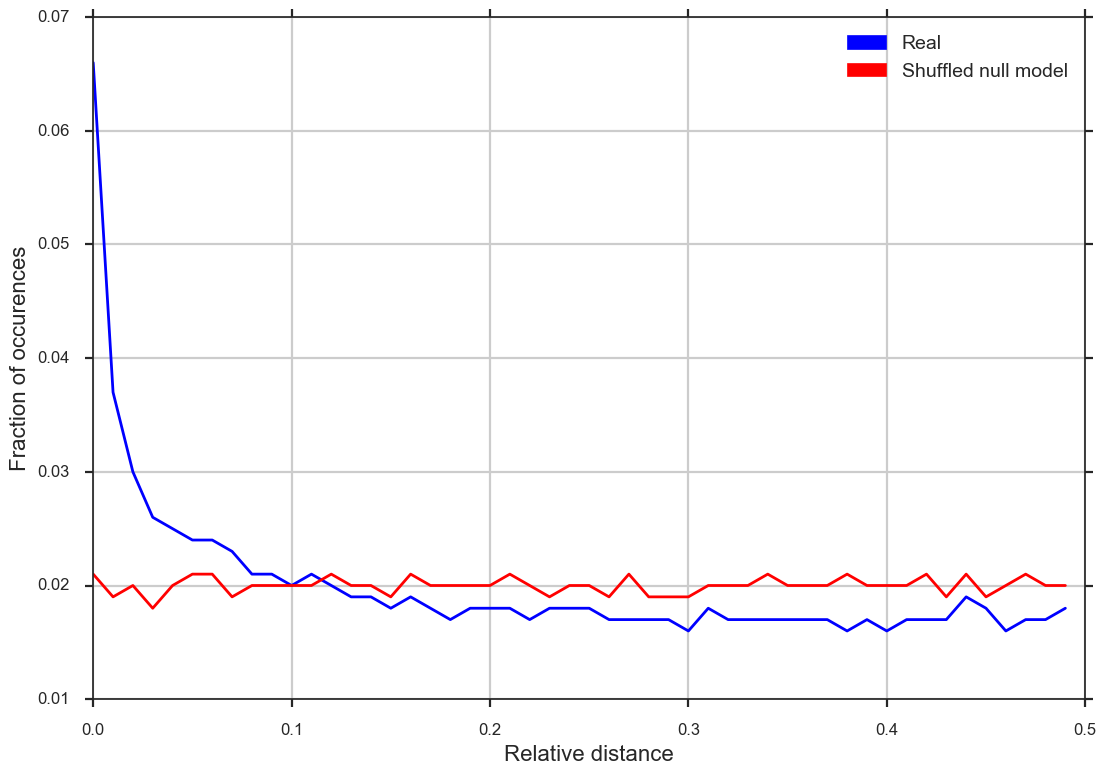

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)
g = plt.plot(df_reldist['reldist'], df_reldist['fraction'], c='blue')
g = plt.plot(df_reldist_random['reldist'], df_reldist_random['fraction'], c='red')
plt.grid()
ax.set_xlabel('Relative distance', size=16)
ax.set_ylabel('Fraction of occurences', size=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(12) 
        
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12) 

green_patch = mpatches.Patch(color='blue', label='Real')
blue_patch = mpatches.Patch(color='red', label='Shuffled null model')

plt.legend(handles=[green_patch, blue_patch], fontsize=14, loc=1)


In [46]:
st.ks_2samp(df_reldist['fraction'], df_reldist_random['fraction'])

Ks_2sampResult(statistic=0.64000000000000001, pvalue=7.8398191124173205e-10)

## z test

In [47]:
import datetime

class Timer(object):
    """A simple timer class"""
    
    def __init__(self):
        pass
    
    def start(self):
        """Starts the timer"""
        self.start = datetime.datetime.now()
        return self.start
    
    def stop(self, message="Total: "):
        """Stops the timer.  Returns the time elapsed"""
        self.stop = datetime.datetime.now()
        return message + str(self.stop - self.start)
    
    def now(self, message="Now: "):
        """Returns the current time with a message"""
        return message + ": " + str(datetime.datetime.now())
    
    def elapsed(self, message="Elapsed: "):
        """Time elapsed since start was called"""
        return message + str(datetime.datetime.now() - self.start)
    
    def split(self, message="Split started at: "):
        """Start a split timer"""
        self.split_start = datetime.datetime.now()
        return message + str(self.split_start)
    
    def unsplit(self, message="Unsplit: "):
        """Stops a split. Returns the time elapsed since split was called"""
        return message + str(datetime.datetime.now() - self.split_start)

In [48]:
real_size = float(encode_bed.intersect(fantom_bed, F=0.8).count())
real_size

6727.0

In [49]:
from joblib import Parallel, delayed
import multiprocessing

def build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, df_columns, idx):
    empty_bed = BedTool()
    random_bed = empty_bed.random(l=intervals_size, n=intervals_num, 
                             g=assembly)
    row_array = [idx, bed.intersect(random_bed, F=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)
    
def build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed_overlap_with.shuffle(g=assembly, chrom=False)
    row_array = [idx, bed.intersect(random_bed, F=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

# creates random sequence and overlap n times and compute a statistics
def create_random_overlap_distribution(bed, bed_overlap_with, assembly, min_overlap, samples_num, strategy='random'):  
    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']
    tests_df = pd.DataFrame(columns=columns)
    
    if strategy == 'shuffle':
        for i in range(0, samples_num):
            tests_df = tests_df.append(build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, columns, i))
    else:
        for i in range(0, samples_num):
            tests_df = tests_df.append(build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, columns, i))
    
    return tests_df

# creates in parallel random sequence and overlap n times and compute a statistics
def create_random_overlap_distribution_parallelized(bed, bed_overlap_with, assembly, min_overlap, samples_num, strategy='random'):  
    num_cores = multiprocessing.cpu_count()
    
    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']
    tests_df = pd.DataFrame(columns=columns)
    
    if strategy == 'shuffle':
        df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap)
                                                   (bed, bed_overlap_with, min_overlap, assembly, columns, i) 
                                                   for i in range(0, samples_num))
    else:
        df_list = Parallel(n_jobs=num_cores)(delayed(build_random_overlap)
                                                   (bed, intervals_size, intervals_num, min_overlap, assembly, columns, i)
                                                   for i in range(0, samples_num))
    return pd.concat(df_list)

def create_random_bed(intervals_size, intervals_num, assembly):
    empty_bed = BedTool()
    return empty_bed.random(l=intervals_size, n=intervals_num, g=assembly)

def test_random_overlap(bed, bed_overlap_with, assembly, min_overlap, samples_num): 
    results = [None]*samples_num
    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    
    for i in range(0, samples_num):
        results[i] = create_random_bed(intervals_size, intervals_num, assembly)
    
    return results
        
def test_parallel_random_overlap(bed, bed_overlap_with, assembly, min_overlap, samples_num): 
    results = [None]*samples_num
    num_cores = multiprocessing.cpu_count()
    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()

    results = Parallel(n_jobs=num_cores)(delayed(create_random_bed)(intervals_size, intervals_num, assembly) for i in range(0, samples_num))
    
    return results

In [50]:
timer = Timer()
timer.start()
create_random_overlap_distribution(encode_bed, fantom_bed, assembly_path, 0.5, 100)
timer.elapsed()

'Elapsed: 0:00:21.572122'

In [51]:
timer = Timer()
timer.start()
runs_parallel_df = create_random_overlap_distribution_parallelized(encode_bed, fantom_bed, assembly_path, 0.5, 1000)
timer.elapsed()

'Elapsed: 0:00:56.789502'

In [52]:
timer = Timer()
timer.start()
runs_parallel_shuffled_df = create_random_overlap_distribution_parallelized(encode_bed, fantom_bed, assembly_path, 0.5, 1000, 'shuffle')
timer.elapsed()

'Elapsed: 0:01:27.268050'

In [53]:
runs_parallel_df.describe()

,sample_num,size
count,1000.000000,1000.00000
mean,499.500000,1003.13800
std,288.819436,30.97868
min,0.000000,904.00000
25%,249.750000,983.00000
50%,499.500000,1003.50000
75%,749.250000,1023.00000
max,999.000000,1099.00000


In [54]:
timer = Timer()
timer.start()
runs_df = create_random_overlap_distribution(encode_bed, fantom_bed, assembly_path, 0.5, 1000)
timer.elapsed()

'Elapsed: 0:03:18.837978'

In [55]:
timer = Timer()
timer.start()
runs_shuffled_df = create_random_overlap_distribution(encode_bed, fantom_bed, assembly_path, 0.5, 1000, 'shuffle')
timer.elapsed()

KeyboardInterrupt: 

In [56]:
runs_df.T

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,990.0,991.0,992.0,993.0,994.0,995.0,996.0,997.0,998.0,999.0
size,1050.0,1046.0,1037.0,984.0,970.0,1075.0,1017.0,1027.0,963.0,1020.0,...,995.0,1002.0,964.0,1043.0,998.0,987.0,1025.0,991.0,1019.0,1019.0


In [57]:
random_mean_size = float(runs_df[['size']].mean())
random_std = float(runs_df[['size']].std())
shuffled_mean_size = float(runs_shuffled_df[['size']].mean())
shuffled_std = float(runs_shuffled_df[['size']].std())


NameError: name 'runs_shuffled_df' is not defined

In [ ]:
#sns.distplot(runs_df[['size']])
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2})
ax = sns.distplot(runs_df[['size']], kde=False, fit=stats.norm, color='red')
ax.set_ylabel('Fraction', size=12)
ax.set_xlabel('Random null model overlap counts', size=12)

In [ ]:
#sns.distplot(runs_df[['size']])
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2})
ax = sns.distplot(runs_shuffled_df[['size']], kde=False, fit=stats.norm)
ax.set_ylabel('Fraction', size=12)
ax.set_xlabel('Shuffled null model overlap counts', size=12)

In [ ]:
z = (real_size - random_mean_size) / random_std
z_shuffled = (real_size - shuffled_mean_size) / shuffled_std

In [ ]:
import scipy.stats as st
print("z from random:", z, "p-value", st.norm.sf(abs(z)))
print("z from shuffled:", z_shuffled, "p-value", st.norm.sf(abs(z_shuffled)))

In [ ]:
print("real size:", real_size, "random mean:", random_mean_size, "shuffled mean:", shuffled_mean_size)
print(random_std, shuffled_std)


In [ ]:
def compute_z(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'z_random', 'z_shuffled', 'fisher_right_p', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, 10):
        min_ovlp = i*0.1
       
        #fisher test
        fisher = bed.fisher(bed_overlap_with, F=min_ovlp, g=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        right_tail_fisher_pvalue = fisher.right_tail

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, F=min_ovlp)
        jaccard_index = jaccard['jaccard']
        
        # z test
        runs_shuffled_df = create_random_overlap_distribution(
            bed, bed_overlap_with, assembly, min_ovlp, samples_num, 'shuffle')
        runs_random_df = create_random_overlap_distribution(
            bed, bed_overlap_with, assembly, min_ovlp, samples_num)
        
        random_mean_count = float(runs_random_df[['size']].mean())
        random_std = float(runs_random_df[['size']].std())
        shuffled_mean_count = float(runs_shuffled_df[['size']].mean())
        shuffled_std = float(runs_shuffled_df[['size']].std())

        z_random = (overlaps_count - random_mean_count) / random_std
        z_shuffled = (overlaps_count - shuffled_mean_count) / shuffled_std
    
        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, z_random, z_shuffled, right_tail_fisher_pvalue, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df


def compute_tests_job(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, min_ovlp, assembly, df_columns, samples_num):
    #fisher test
    fisher = bed.fisher(bed_overlap_with, F=min_ovlp, g=assembly)
    overlaps_count = fisher.table['in -a']['in -b']
    right_tail_fisher_pvalue = fisher.right_tail

    # jaccard index
    jaccard = bed.jaccard(bed_overlap_with, F=min_ovlp)
    jaccard_index = jaccard['jaccard']
    
    # z test
    runs_shuffled_df = create_random_overlap_distribution_parallelized(
        bed, bed_overlap_with, assembly, min_ovlp, samples_num, 'shuffle')
    runs_random_df = create_random_overlap_distribution_parallelized(
        bed, bed_overlap_with, assembly, min_ovlp, samples_num)
    
    random_mean_count = float(runs_random_df[['size']].mean())
    random_std = float(runs_random_df[['size']].std())
    shuffled_mean_count = float(runs_shuffled_df[['size']].mean())
    shuffled_std = float(runs_shuffled_df[['size']].std())

    z_random = (overlaps_count - random_mean_count) / random_std
    z_shuffled = (overlaps_count - shuffled_mean_count) / shuffled_std
    
    row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                 min_ovlp, overlaps_count, z_random, z_shuffled, right_tail_fisher_pvalue, jaccard_index]

    return pd.DataFrame([row_array], columns=df_columns)

def compute_z_parallelized(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly, samples_num, random_samples_num):
    #num_cores = multiprocessing.cpu_count()
    
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'z_random', 'z_shuffled', 'fisher_right_p', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
#    df_list = Parallel(n_jobs=num_cores)(delayed(compute_tests_job)(
#            bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, i*0.1, assembly, columns, samples_num) 
#                               for i in range(1, 10))

#    tests_df = pd.concat(df_list)
#    tests_df.reset_index(inplace=True, drop=True)
#    return tests_df

        
    for i in range(1, samples_num):
        min_ovlp = i * 1. / samples_num
        #min_ovlp = i*0.1
       
        #fisher test
        fisher = bed.fisher(bed_overlap_with, F=min_ovlp, g=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        right_tail_fisher_pvalue = fisher.right_tail

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, F=min_ovlp)
        jaccard_index = jaccard['jaccard']
        
        # z test
        runs_shuffled_df = create_random_overlap_distribution_parallelized(
            bed, bed_overlap_with, assembly, min_ovlp, random_samples_num, 'shuffle')
        runs_random_df = create_random_overlap_distribution_parallelized(
            bed, bed_overlap_with, assembly, min_ovlp, random_samples_num)
        
        random_mean_count = float(runs_random_df[['size']].mean())
        random_std = float(runs_random_df[['size']].std())
        shuffled_mean_count = float(runs_shuffled_df[['size']].mean())
        shuffled_std = float(runs_shuffled_df[['size']].std())

        z_random = (overlaps_count - random_mean_count) / random_std
        z_shuffled = (overlaps_count - shuffled_mean_count) / shuffled_std
    
        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, z_random, z_shuffled, right_tail_fisher_pvalue, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df

In [ ]:
# need to parallelize!!!
timer = Timer()
timer.start()
test_z_df = compute_z_parallelized(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'placenta', assembly_path, 20, 50)
timer.elapsed()

In [ ]:
test_z_df['log_z_random'] = np.log(test_z_df['z_random'])
test_z_df['log_z_shuffled'] = np.log(test_z_df['z_shuffled'])
test_z_df['z_pvalue_random'] = test_z_df.apply(lambda row: st.norm.sf(abs(row['z_random'])), axis=1)
test_z_df['z_pvalue_shuffled'] = test_z_df.apply(lambda row: st.norm.sf(abs(row['z_shuffled'])), axis=1)
test_z_df

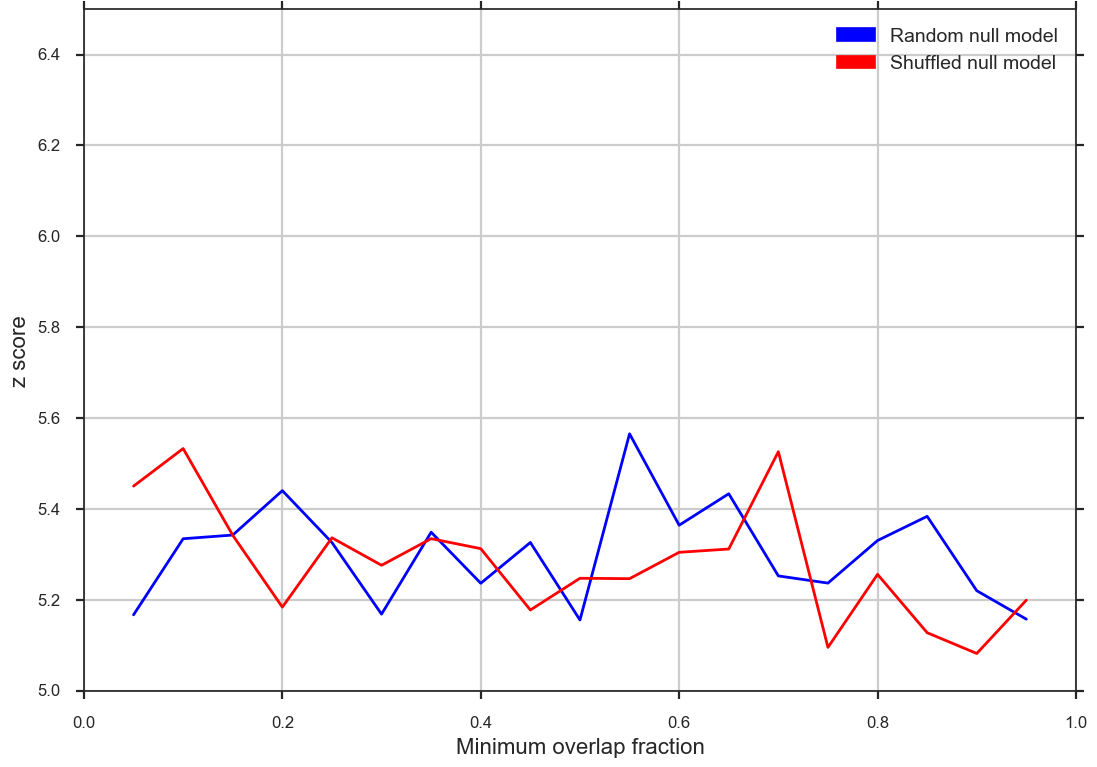

In [345]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)
g = plt.plot(test_z_df['min_ovlp'], test_z_df['log_z_random'], c='blue')
g = plt.plot(test_z_df['min_ovlp'], test_z_df['log_z_shuffled'], c='red')
plt.grid()

ax.axes.set_ylim(5, 6.5)
ax.set_xlabel('Minimum overlap fraction', size=16)
ax.set_ylabel('z score', size=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(12) 
        
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12) 

green_patch = mpatches.Patch(color='blue', label='Random null model')
blue_patch = mpatches.Patch(color='red', label='Shuffled null model')

plt.legend(handles=[green_patch, blue_patch], fontsize=14, loc=1)

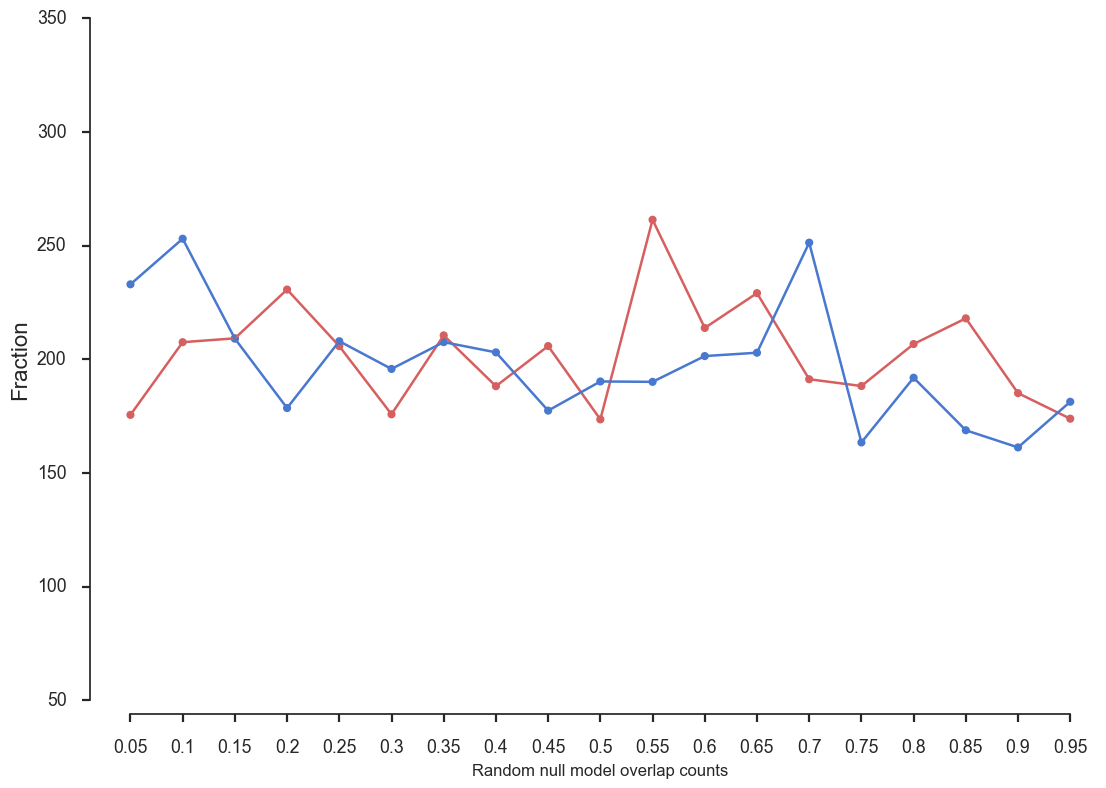

In [340]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})

g1 = sns.pointplot(x='min_ovlp', y='z_random', data=test_z_df,  color='r')
g2 = sns.pointplot(x='min_ovlp', y='z_shuffled', data=test_z_df, color='b')
g1.axes.set_ylim(50, 350)
sns.despine(offset=10, trim=True)

g1.set_ylabel('Fraction', size=16)
g1.set_xlabel('Random null model overlap counts', size=12)

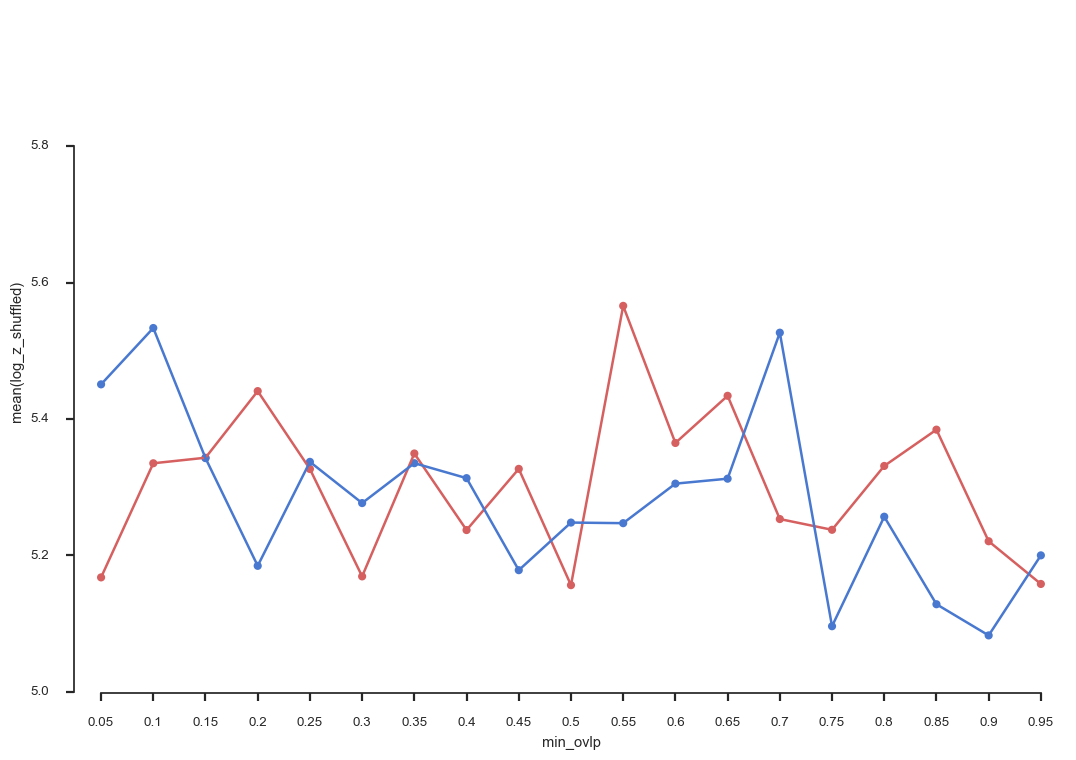

In [337]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 1})
g1 = sns.pointplot(x='min_ovlp', y='log_z_random', data=test_z_df,  color='r')
g2 = sns.pointplot(x='min_ovlp', y='log_z_shuffled', data=test_z_df, color='b')

g1.axes.set_ylim(5.0, 6.0)
sns.despine(offset=1, trim=True)

## Massive tests on tissues

In [1]:
import pandas as pd

In [2]:
tests_df = pd.read_hdf('../storage/stats.hdf', 'encode_fantom_tests')
tests_df.reset_index(drop=True, inplace=True)

In [3]:
tests_df.T

,0,1,2,3,4,5,6,7,8,9,...,731,732,733,734,735,736,737,738,739,740
biosample_name,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,adrenal gland,...,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine,small intestine
encyclopedia,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,...,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE,ENCODE
encyclopedia_size,38634,38634,38634,38634,38634,38634,38634,38634,38634,38634,...,38719,38719,38719,38719,38719,38719,38719,38719,38719,38719
fisher_left_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
fisher_oddsratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.059,0.053,0.05,0.047,0.041,0.04,0.037,0.035,0.03,0.026
fisher_right_p,1,1,2.5407e-239,2.0708e-28,0.99631,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fisher_two_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
jaccard,0.0245088,0.0176481,0.0120312,0.00818131,0.00591123,0.00426546,0.00302555,0.00213949,0.00162165,0.00126438,...,0.000168556,0.000150199,0.000135367,0.000108888,8.61319e-05,8.46177e-05,7.97214e-05,7.62402e-05,6.29808e-05,5.50848e-05
min_ovlp,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
ovlp_count,6063,3935,2507,1627,1145,817,580,430,341,285,...,58,52,49,46,41,40,37,35,30,26


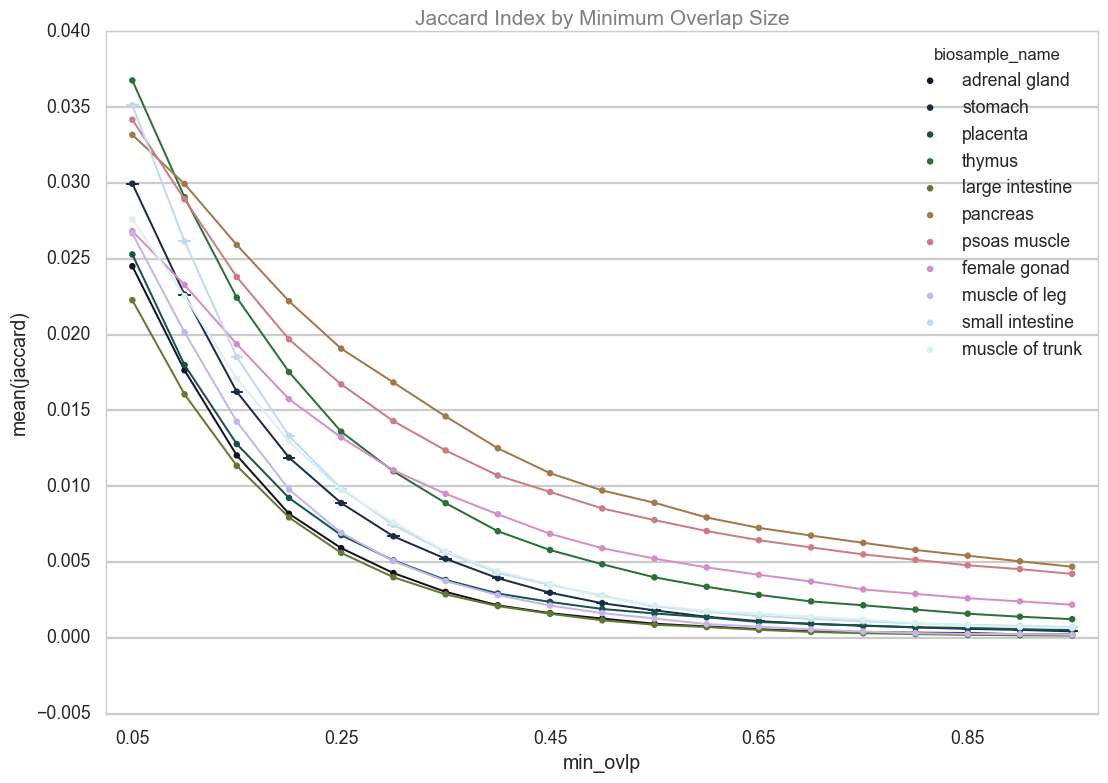

In [5]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

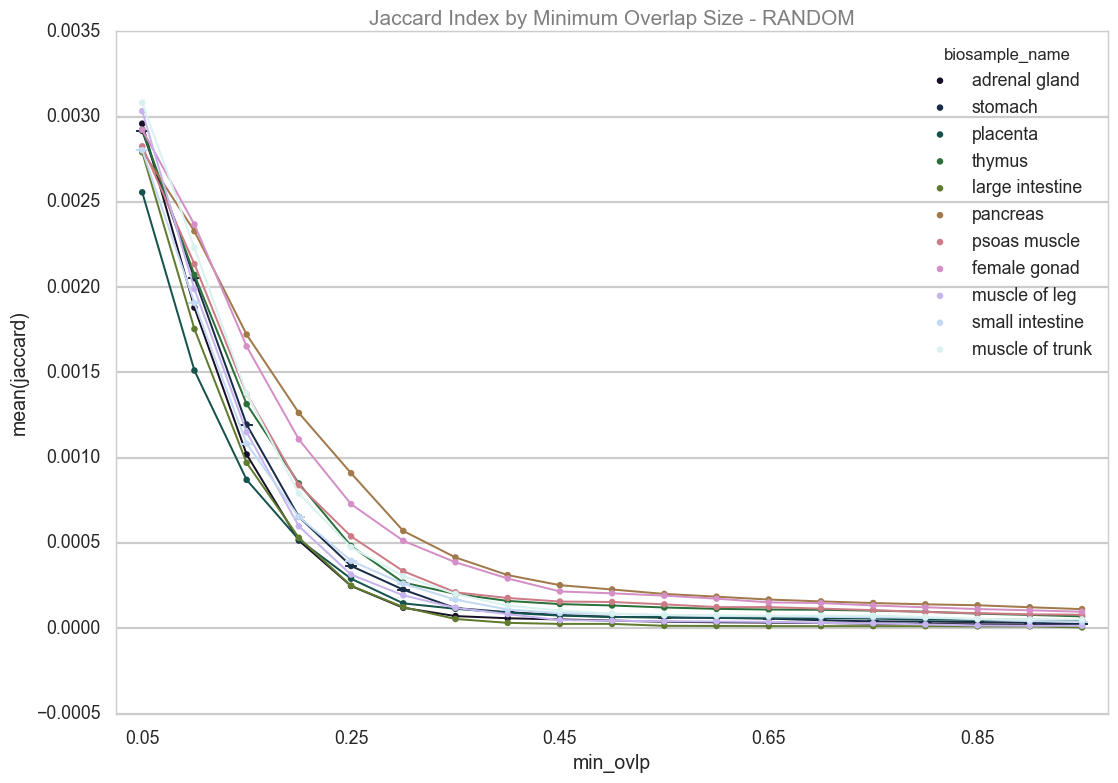

In [6]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="RANDOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size - RANDOM', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

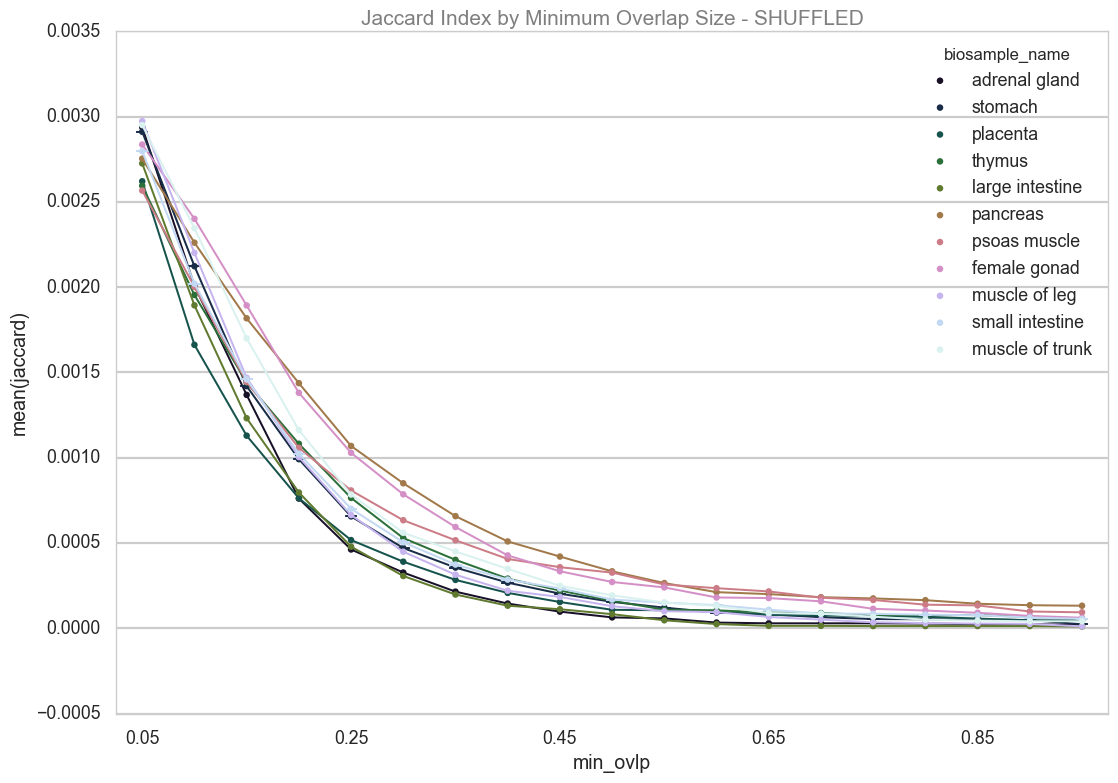

In [7]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="SHUFFLED"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size - SHUFFLED', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [8]:
tests_df['log_p'] = tests_df['fisher_right_p']

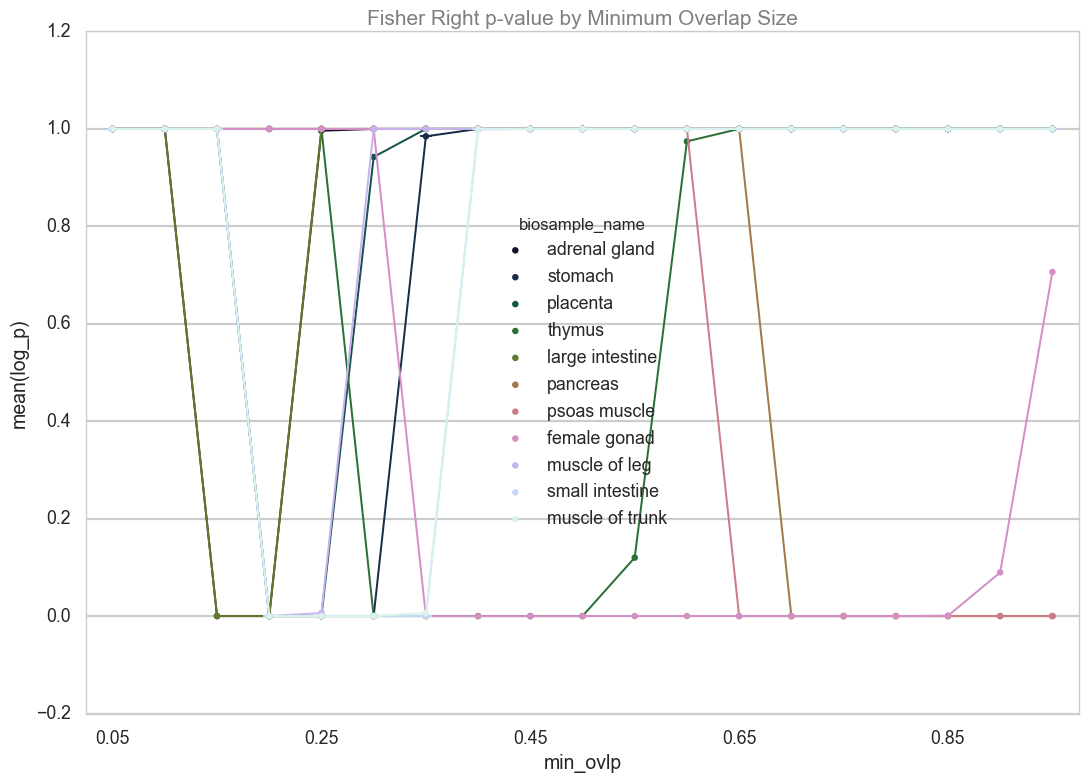

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="log_p", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Fisher Right p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

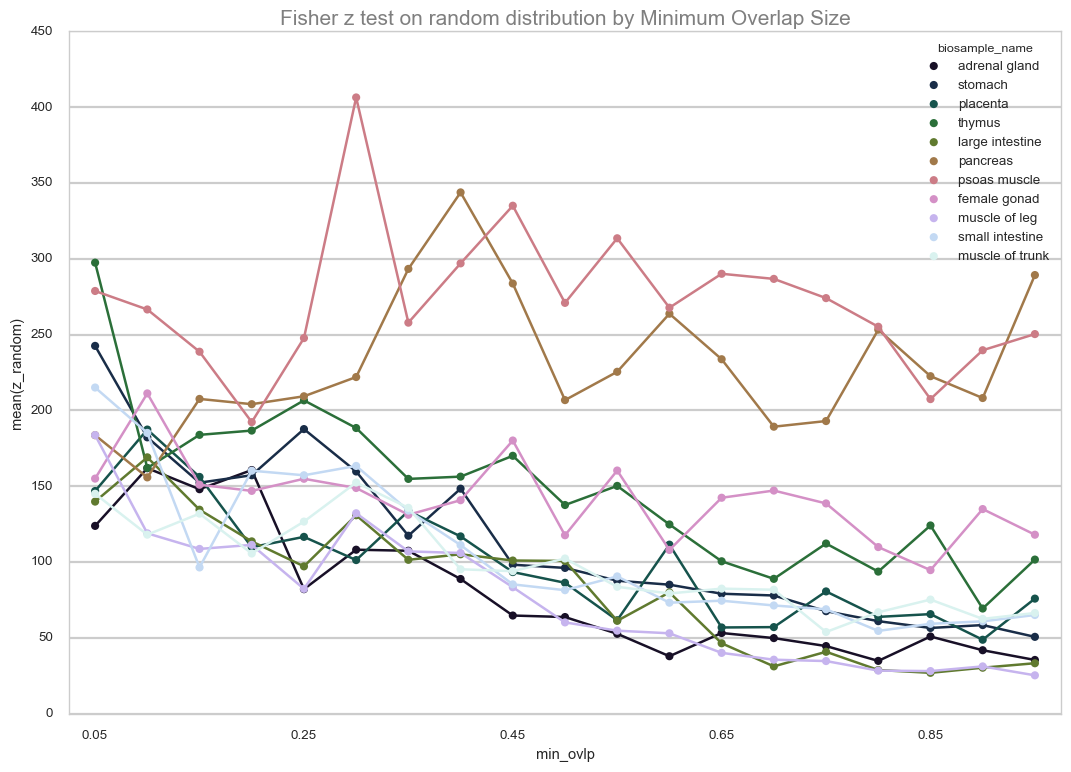

In [17]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="z_random", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1, ci=None)
g.axes.set_title('Fisher z test on random distribution by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

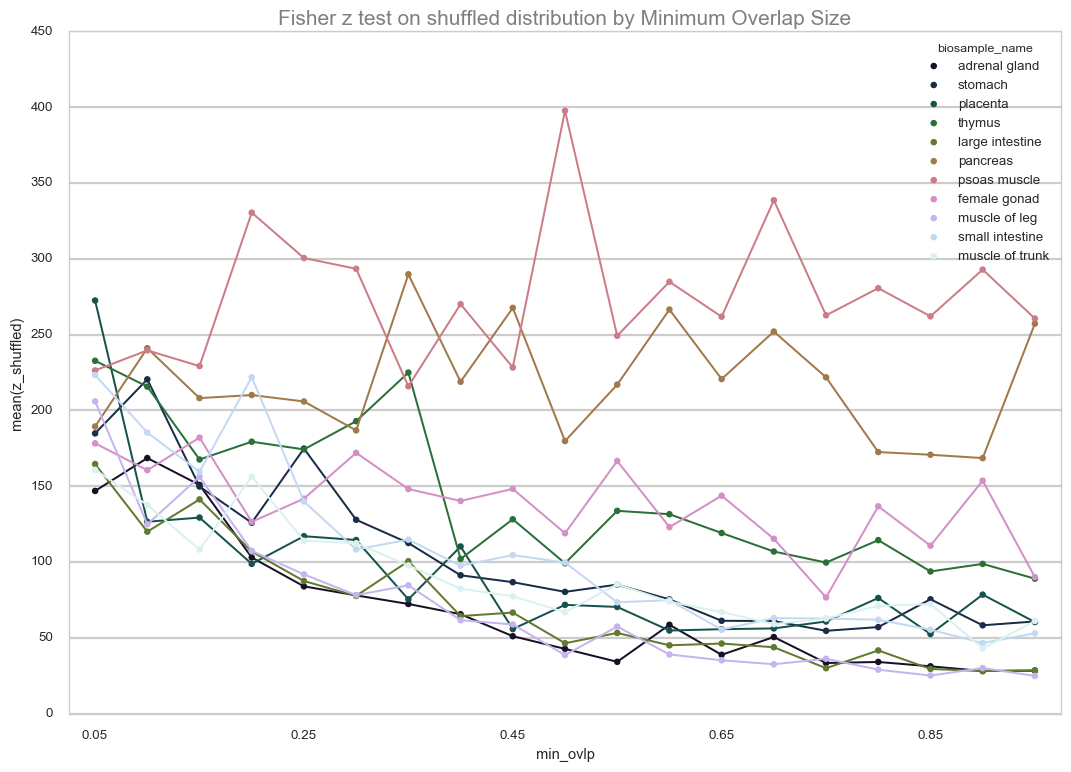

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="z_shuffled", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1, ci=None)
g.axes.set_title('Fisher z test on shuffled distribution by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

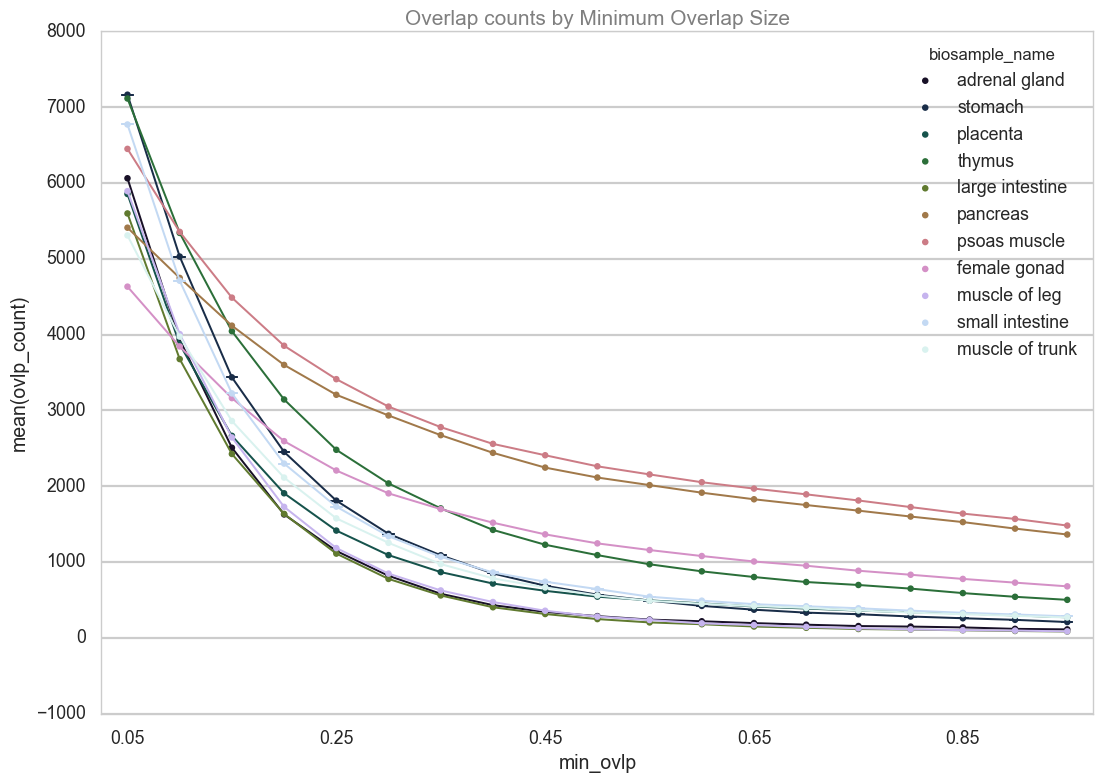

In [20]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="min_ovlp", y="ovlp_count", hue="biosample_name", data=tests_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Overlap counts by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [21]:
reldist_df = pd.read_hdf('../storage/stats.hdf', 'encode_fantom_reldist')

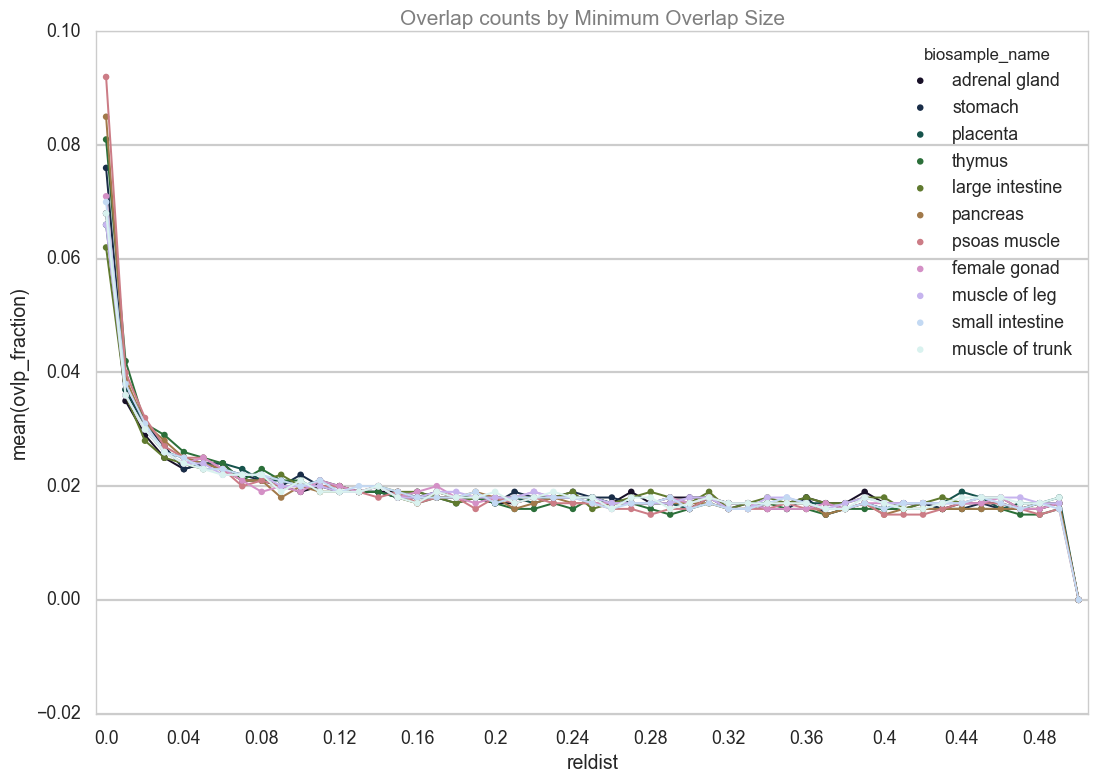

In [23]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
g = sns.pointplot(x="reldist", y="ovlp_fraction", hue="biosample_name", data=reldist_df.query('ovlp_encyclopedia=="FANTOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Overlap counts by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

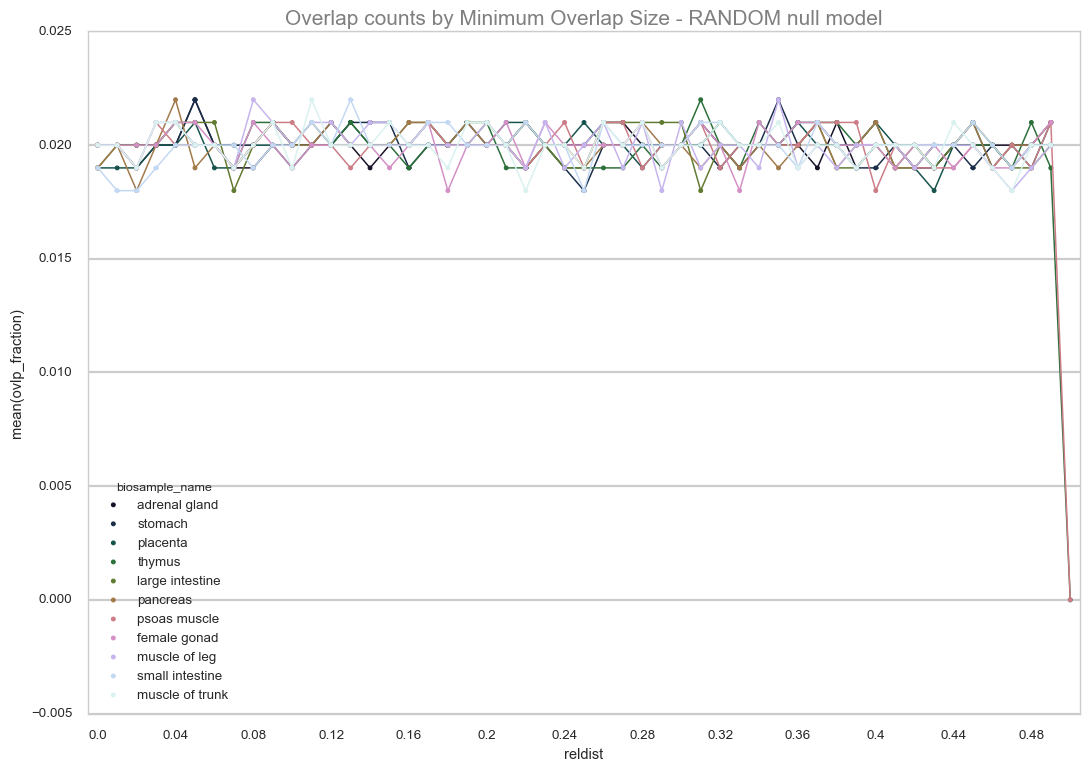

In [26]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.6})
g = sns.pointplot(x="reldist", y="ovlp_fraction", hue="biosample_name", data=reldist_df.query('ovlp_encyclopedia=="RANDOM"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Overlap counts by Minimum Overlap Size - RANDOM null model', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

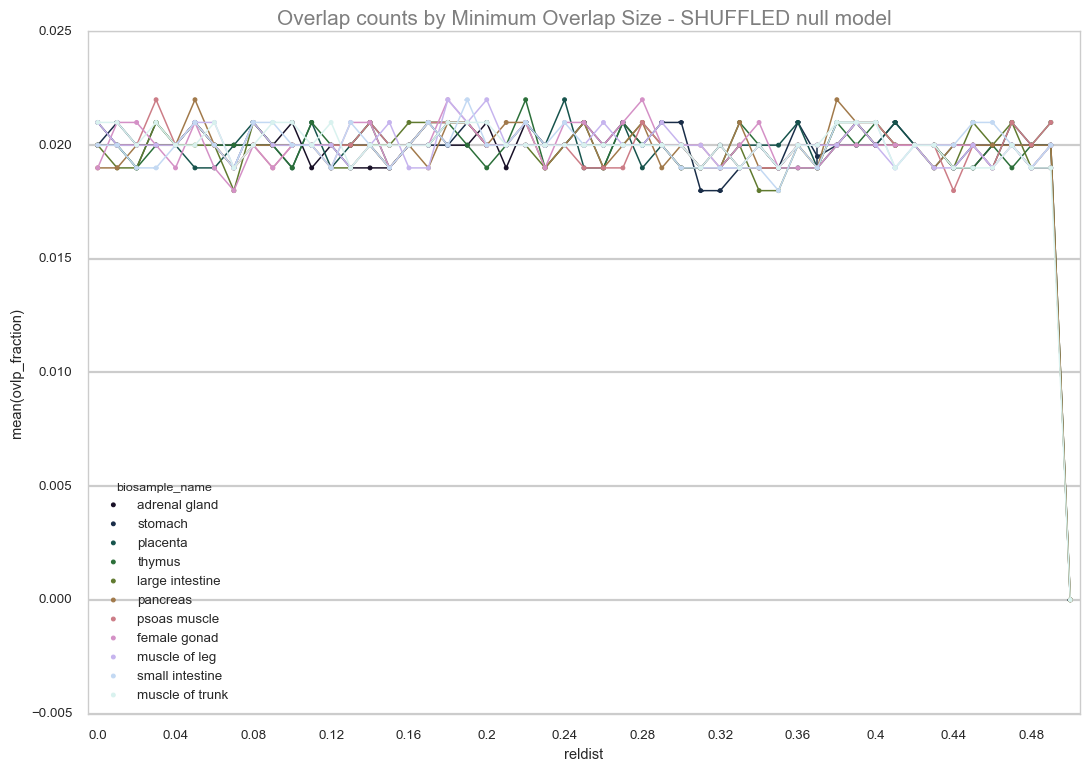

In [28]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.6})
g = sns.pointplot(x="reldist", y="ovlp_fraction", hue="biosample_name", data=reldist_df.query('ovlp_encyclopedia=="SHUFFLED"'),
                   capsize=.2, palette="cubehelix", size=6, aspect=1)
g.axes.set_title('Overlap counts by Minimum Overlap Size - SHUFFLED null model', fontsize=15,color="black",alpha=0.5)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)